# **UNIVERSIDAD MILITAR NUEVA GRANADA**

---
# **INGENIERÍA EN TELECOMUNICACIONES**
---

# **CONVOLUCIÓN DISCRETA**

---
Nombre: Brayan Alexander Romero Suarez

---






**El taller se debe entregar de forma individual.**

---
**Si el taller se entrega de forma posterior al día y hora señalados, no será calificado.**

---
# Fecha de entrega:  22 de febrero de 2023.
# Hora máxima de entrega:  7:00 a.m.


x[n] =  1 s [n + 3 ]  +  2 s [n + 2 ]  +  3 s [n + 1 ]  +  2 s [n - 0 ]  +  4 s [n - 1 ]  +  3 s [n - 2 ]  +  1 s [n - 3 ] 
h[n] =  3 s [n + -2 ]  +  2 s [n - 3 ]  +  3 s [n - 4 ] 

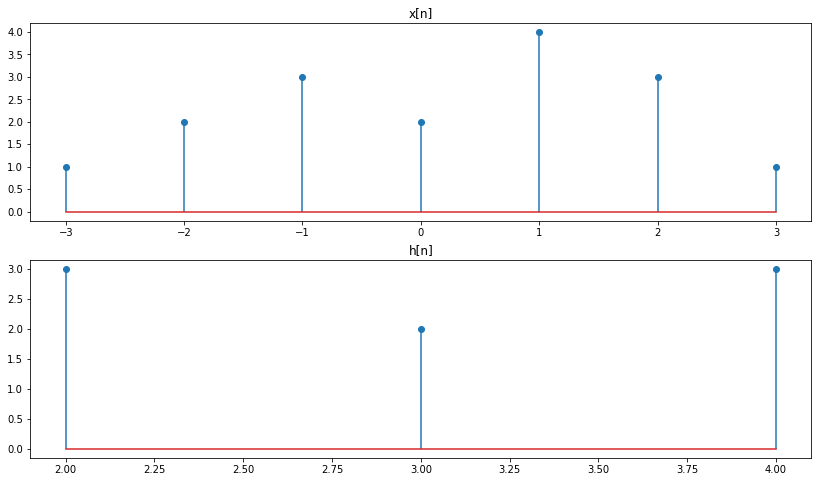

In [ ]:
# PRIMERA PARTE:

#.  Asuma una señal x[n], mínimo de 5 impulsos diferentes de cero
#.  Escriba matemáticamente la señal x[n]
#.  Asuma una señal h[n], mínimo de 3 impulsos diferentes de cero
#.  Escriba matemáticamente la señal h[n]
#.  Dibuje las dos señales

#______________________________________________
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Señales
# x[n]= s[n+3] + 2s[n+2] + 3s[n+1] + 2s[n-0] + 4s[n-1] + 3s[n-2] + s[n-3]
# h[n]= 3s[n-2] + 2s[n-3] + 3s[n-4]

x=np.array([[1,-3],[2,-2],[3,-1],[2,0],[4,1],[3,2],[1,3]]) #Amplitudes junto a su tiempo

h=np.array([[3,2],[2,3],[3,4]])  #Amplitudes junto con su tiempo

plt.rcParams["figure.figsize"] = (14,8) #Tamaño de graficos

#Grafica superior
ax=plt.subplot(2,1,1) 
plt.stem(x[:,1] , x[:,0],use_line_collection=True )
plt.title('x[n]')

#Grafica inferior
ax=plt.subplot(2,1,2)
plt.stem(h[:,1] , h[:,0],use_line_collection=True)
plt.title('h[n]')

#Ecuaciones
print("x[n] = ", end=" ")
for i in range(len(x[:,0])):
  if i==0:
    if x[i,1]>=0 and i != 0 :
      print(x[i,0],"s [n -",x[i,1],"] ",end="")
    else:
      print(x[i,0],"s [n +",-x[i,1],"] ",end="")
  if i!=0:
    if x[i,1]>=0 and i != 0 :
      print(" + ",x[i,0],"s [n -",x[i,1],"] ",end="")
    else:
      print(" + ",x[i,0],"s [n +",-x[i,1],"] ",end="")

print()

print("h[n] = ", end=" ")
for i in range(len(h[:,0])):
  if i==0:
    if h[i,1]>=0 and i != 0 :
      print(h[i,0],"s [n -",h[i,1],"] ",end="")
    else:
      print(h[i,0],"s [n +",-h[i,1],"] ",end="")
  if i!=0:
    if h[i,1]>=0 and i != 0 :
      print(" + ",h[i,0],"s [n -",h[i,1],"] ",end="")
    else:
      print(" + ",h[i,0],"s [n +",-h[i,1],"] ",end="")



y[n] =  3.0 s [n  -7.0 ]  +  11.0 s [n - 6.0 ]  +  3.0 s [n + 1.0 ]  +  8.0 s [n - 0.0 ]  +  16.0 s [n - 1.0 ]  +  18.0 s [n - 2.0 ]  +  25.0 s [n - 3.0 ]  +  23.0 s [n - 4.0 ]  +  21.0 s [n - 5.0 ] 

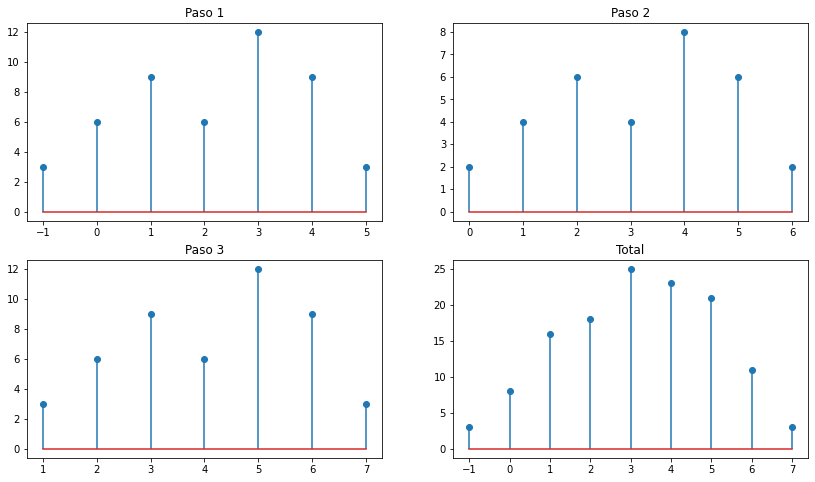

In [ ]:
#. SEGUNDA PARTE

#.  Realice convolución método 1
#.  Dibuje el paso a paso y la señal de salida resultante
#.  Escriba matemáticamente la señal y[n]

#______________________________________________


x_final=np.zeros((len(x[:,1]), len(x[1,:])))
conv1=np.zeros((len(x[:,1]), len(x[1,:])))
conv2=np.zeros((len(x[:,1]), len(x[1,:])))
conv3=np.zeros((len(x[:,1]), len(x[1,:])))


#Se hacen las tres convoluciones de forma independiente
for i in range(3):
  ax=plt.subplot(2,2,i+1)
  x1=np.array(x)

  x1[:,1]=x1[:,1] + h[i,1] #Suma de tiempos
  x1[:,0]=x1[:,0] * h[i,0] #Multiplicacion de amplitudes
  
  if i==0:
    conv1[:,:]=x1[:,:]
  elif i==1:
    conv2[:,:]=x1[:,:]
  else:
    conv3[:,:]=x1[:,:]

  plt.stem(x1[:,1] , x1[:,0],use_line_collection=True )
  plt.title("Paso " + str(i+1))
#-----------------------FIN FOR----------------------------------------

#Se suman los convoluciones obtenidas

for i in range(len(conv1[:,1])-1):
  x_final[i,0]=conv1[i+1,0] + conv2[i,0] #Suma de amplitudes en comun entre conv1 y conv2
  x_final[i,1]=conv1[i+1,1] #Agregas tiempos en comun entre conv1 y conv2

for i in range(len(conv1[:,1])-2):
  #Suma componenentes en comun entre suma 1,2 y conv3
  x_final[i+1,0]=x_final[i+1,0] + conv3[i,0]


for i in range(len(conv1[:,1])-1):
  if conv1[i,1] not in x_final[:,1]:
    #Agrega tiempos que solo estan en conv1  
    x_final=np.insert(x_final,0,[[conv1[i,0] , conv1[i,1]]],axis=0)

for i in range(len(conv1[:,1])):
  #Agrega tiempos en comun de conv2 y conv3 
  if (conv2[i,1] not in x_final[:,1]) and (conv2[i,1]==conv3[i-1,1]): 
    x_final=np.insert(x_final,0,[[conv2[i,0] , conv2[i,1]]],axis=0)
    x_final=np.insert(x_final,0,[[conv3[i-1,0] , conv3[i-1,1]]],axis=0)

#Agrega tiempos que esten unicamente en conv3
for i in range(len(conv1[:,1])):
  if conv3[i,1] not in x_final[:,1]:
    x_final=np.insert(x_final,0,[[conv3[i,0] , conv3[i,1]]],axis=0)

#Suma amplitudes de tiempos repetidos y borra para solo tener uno final
for i in range(len(x_final[:,1])-2):
  if x_final[i,1] == x_final[i+1,1]:
    x_final[i,0] += x_final[i+1,0]
    x_final=np.delete(x_final,i+1,axis=0)

#Borra elemento original de la matrices de ceros
x_final=np.delete(x_final,-1,axis=0)

#Grafica convolucion final
ax=plt.subplot(2,2,4)
plt.stem(x_final[:,1] , x_final[:,0],use_line_collection=True)
plt.title('Total')

#Ecuacion del resultado
print("y[n] = ", end=" ")
for i in range(len(x_final[:,0])):
  if i==0:
    if x_final[i,1]>=0 and i != 0 :
      print(x_final[i,0],"s [n -",x_final[i,1],"] ",end="")
    else:
      print(x_final[i,0],"s [n ",-x_final[i,1],"] ",end="")
  if i!=0:
    if x_final[i,1]>=0 and i != 0 :
      print(" + ",x_final[i,0],"s [n -",x_final[i,1],"] ",end="")
    else:
      print(" + ",x_final[i,0],"s [n +",-x_final[i,1],"] ",end="")



In [ ]:
x_profe=np.array([1,2,3,2,4,3,1])
h_profe=np.array([3, 2,3])
resultado = np.convolve(x_profe,h_profe)
print(resultado)

[ 3  8 16 18 25 23 21 11  3]


y[n] =  3.0 s [n + 1.0 ]  +  8.0 s [n - 0.0 ]  +  16.0 s [n - 1.0 ]  +  18.0 s [n - 2.0 ]  +  25.0 s [n - 3.0 ]  +  23.0 s [n - 4.0 ]  +  21.0 s [n - 5.0 ]  +  11.0 s [n - 6.0 ]  +  3.0 s [n - 7.0 ] 

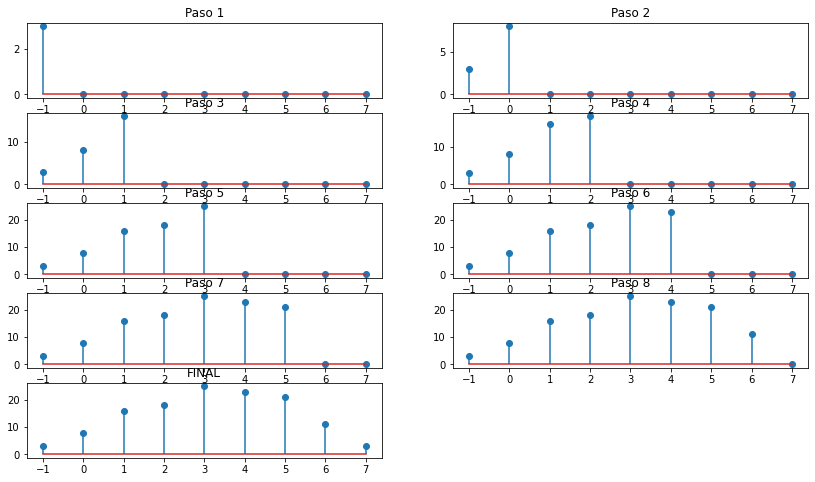

In [ ]:
#. TERCERA PARTE

#.  Realice convolución método 2
#.  Dibuje el paso a paso y la señal de salida resultante
#.  Escriba matemáticamente la señal y[n]

#______________________________________________
# Inserte código aquí

plt.rcParams["figure.figsize"] = (18,8)
xk=np.array(x)
hk=np.array(h)
#Matriz resultado con las dimensiones del resultado
result=np.zeros((len(xk[:,1]) + (len(hk[:,1])-1),2)) 

#Tiempos
j=1
while j < len(hk[:,1]):
  for i in range((len(xk[:,1])) + (len(hk[:,1])-1)):#Recorre primeros 7 valores  
    if i < len(xk[:,1]): 
      result[i,1]= hk[i-i,1] + xk[i,1] #Suma h[n-2] a las componentes
      j=1
    else:
      #Despues de 7 valores se suman al ultimo valor de xk
      result[i,1]= hk[j,1] + xk[-1,1] 
      j+=1
#---------------------------------------------------------------------------
k=1 #Variable auxiliar
plt.rcParams["figure.figsize"] = (14,8) #Tamaño de graficos

#Amplitudes y graficos paso por paso
for i in range((len(xk[:,1])) + (len(hk[:,1])-1)): #Itera el numero de pasos necesarios    

#PASO 1
#Cuando solo se define [n-2]
  if i==0:
    result[i,0]=hk[i,0]*xk[i,0]
    ax=plt.subplot(5,2,i+1)
    plt.stem(result[:,1] , result[:,0], use_line_collection=True )
    plt.title("Paso " + str(i+1))
    continue

#Estan definidos [n-2] y [n-1]
#PASO 2
  if k-i==0 and k==1:
      m=i
      while m>=0:
        for j in range(k+1):
            result[i,0]+= hk[j,0]*xk[m,0]
            m-=1
      ax=plt.subplot(5,2,i+1)
      plt.stem(result[:,1] , result[:,0], use_line_collection=True )
      plt.title("Paso " + str(i+1))
      if k<len(hk[:,0]): k+=1
      continue

#Estan definidos todos los impulsos
#PASO 3
  if k-i==0:
    m=i
    while m>=0:
      for j in range(k+1):
        result[i,0]+= hk[j,0]*xk[m,0]
        m-=1
    ax=plt.subplot(5,2,i+1)
    plt.stem(result[:,1] , result[:,0], use_line_collection=True )
    plt.title("Paso " + str(i+1))

#Se desplazan todos los impulso
#PASO 4-7
  if k-i<0 and i<len(xk[:,1]):
    m=i
    while m >=i-k:
      for j in range(k+1):
        result[i,0]+= hk[j,0]*xk[m,0]
        m-=1
    ax=plt.subplot(5,2,i+1)
    plt.stem(result[:,1] , result[:,0], use_line_collection=True )
    plt.title("Paso " + str(i+1))

#Empiezan a "salir" los impulsos de la señal
#PASO 8
  if k-i<0 and i>=len(xk[:,1]) and i<(len(result[:,1])-1)   :
    m=k
    while m>0:
      for j in range((len(xk[:,1])-k), len(xk[:,1])):
        result[i,0] += hk[m,0]*xk[j,0]
        m-=1
    k-=1
    ax=plt.subplot(5,2,i+1)
    plt.stem(result[:,1] , result[:,0], use_line_collection=True )
    plt.title("Paso " + str(i+1))

#Solo queda el ultimo impulso por operar 
#PASO 9
  if i== (len(result[:,1])-1):
    k=len(hk[:,1])-1
    result[i,0] += hk[k,0]*xk[-1,0]
    ax=plt.subplot(5,2,i+1)
    plt.stem(result[:,1] , result[:,0], use_line_collection=True )
    plt.title("FINAL")  


print("y[n] = ", end=" ")
for i in range(len(result[:,0])):
  if i==0:
    if result[i,1]>=0 and i != 0 :
      print(result[i,0],"s [n -",result[i,1],"] ",end="")
    else:
      print(result[i,0],"s [n +",-result[i,1],"] ",end="")
  if i!=0:
    if result[i,1]>=0 and i != 0 :
      print(" + ",result[i,0],"s [n -",result[i,1],"] ",end="")
    else:
      print(" + ",result[i,0],"s [n +",-result[i,1],"] ",end="")


**RÚBRICA DE EVALUACIÓN:**

---
1.   Señales x[n] y h[n]: 

*   correcto: 100 pts.
*   incorrecto: 0 pts.

2.   Método 1:

*   correcto: 200 pts.
*   parcialmente correcto: 100 pts.
*   incorrecto: 0 pts.

3.   Método 2:

*   correcto: 200 pts.
*   parcialmente correcto: 100 pts.
*   incorrecto: 0 pts.

---
1. Insatisfactorio: el estudiante solamente define y dibuja las señales de forma correcta.
2. En proceso: el estudiante define y dibuja las señales de forma correcta, y realiza la convolución de forma parcialmente correcta con alguno de los métodos.
3. Satisfactorio: el estudiante define y dibuja las señales de forma correcta, y realiza la convolución de forma correcta con alguno de los métodos.
4. Excelente: el estudiante define y dibuja las señales de forma correcta, y realiza la convolución de forma correcta con los métodos.